In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import multitool as mt
import importlib
importlib.reload(mt)

#An example of a multiplex network

#First let's build the layers
M0 = nx.empty_graph(10)
M1 = nx.star_graph(9)
M2 = nx.cycle_graph(10)

M = mt.Multiplex([M0,M1,M2])
#Note that there will be a warning when there is a disconnected layer

In [3]:
#Note the error if a layer doesn't have the same nodeset as the others
G = nx.complete_graph(6)
M1 = mt.Multiplex([M0,M1,M2,G])

ValueError: The node sets of each layer needs to be the same in a multiplex network

In [4]:
#We can get the nodes from M
print(M.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
#We can get the edges from each layer of M
print(M.edges)

[EdgeView([]), EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]), EdgeView([(0, 1), (0, 9), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])]


In [6]:
#We can flatten all of the layers to get a single network
G = M.flatten()

print(G.nodes())
print(G.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


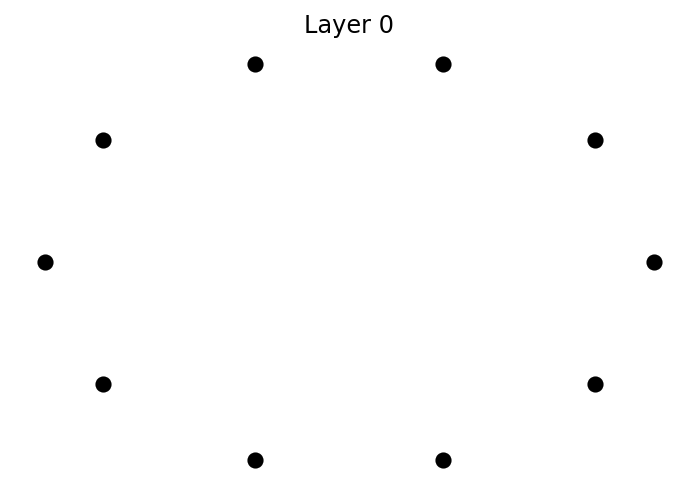

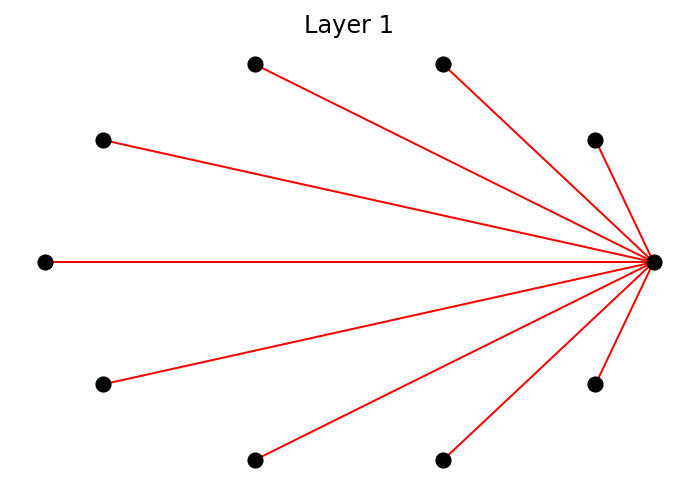

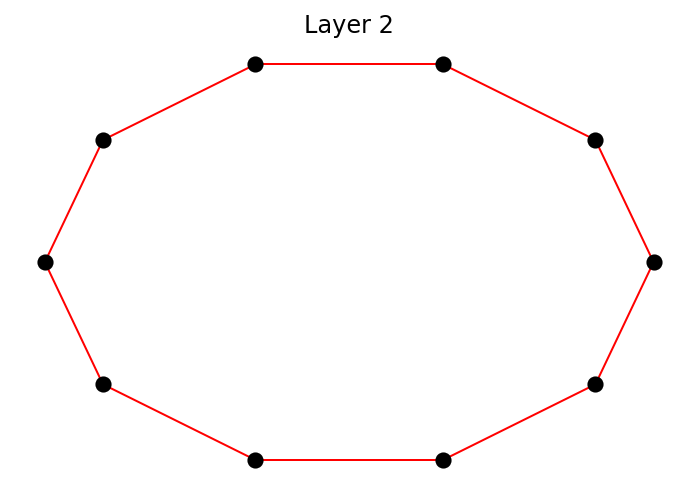

In [48]:
#We can also plot each layer
M.plots(edge_color='red', layout = nx.circular_layout)

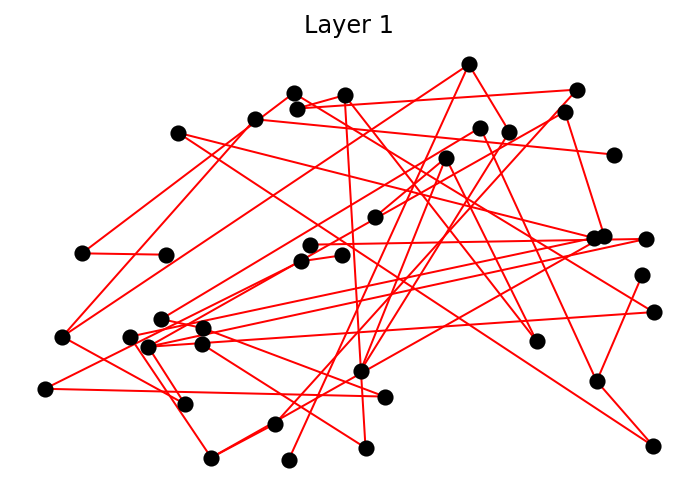

In [18]:
#Or we can plot just a single layer
M.plot(1, edge_color='red')

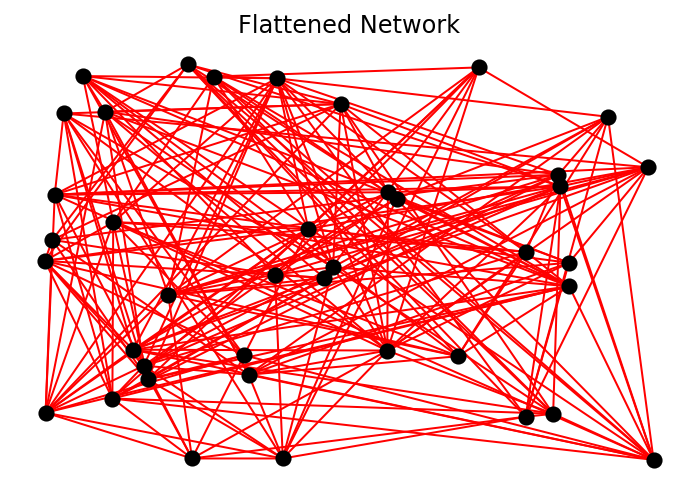

In [19]:
#Or we can plot the flattened network
M.plot_flat(edge_color='red')

In [10]:
#We can compute the first k non-trivial diffusion eigenmodes of layer 1

print(M.spectral_embedding(1,2))

[[-1.11022302e-16 -2.22044605e-16]
 [-1.70054556e-01  2.02849103e-01]
 [ 4.32645010e-02 -5.72680516e-01]
 [ 1.06008784e-01 -6.04588823e-01]
 [-2.86557876e-01  3.52605872e-01]
 [-1.96671749e-01  6.01003025e-03]
 [ 8.01143844e-01  2.79390837e-01]
 [-3.51050682e-01  1.29940749e-01]
 [ 2.14914944e-01  2.14446234e-01]
 [-1.60997210e-01 -7.97348577e-03]]


[1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1]


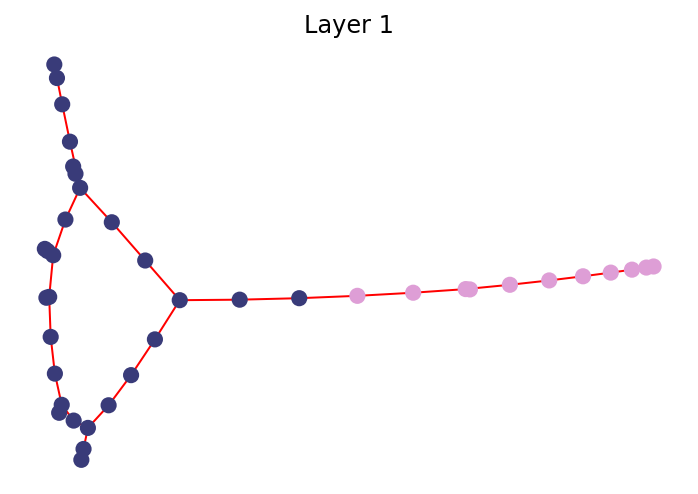

In [21]:
#And we can cluster the nodes in layer 1 into 2 clusters using spectral clustering. 

spec1 = M.spectral_cluster(1,2,2, random_state = 42)
print(spec1)

#Using these clusters, we can color the nodes.
M.plot(1, edge_color='red', node_color=spec1, layout=nx.spectral_layout)

In [12]:
#Lets build a multiplex network where each layer is a connected watts strogatz graph
X = [nx.connected_watts_strogatz_graph(40,3,.5, seed = i) for i in range(10)]

M = mt.Multiplex(X)

In [13]:
#Now, let's test each clustering method. Method 1 involves Hamming distance based on the spectral clustering of each layer with DBSCAN

#This will use a k value of 15, and a number of clusters per layer of 4. Notice that some of these nodes are not assigned clusters easily
print(M.multi_cluster1(15, m=4))

#We can also modify the eps and min_samples. This might take time to find a good combination
print(M.multi_cluster1(20, m=5, eps=5, min_samples=4))

#Ultimately, this doesn't seem like a good clustering method

[-1  0 -1 -1  1 -1 -1  2  3 -1  4  4  4  1 -1 -1 -1 -1 -1  2  3  1  1 -1
 -1  5  5  1  1  6  6  0 -1 -1 -1 -1  3  3 -1 -1]


[ 0  0 -1  0 -1 -1 -1 -1  0 -1  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1
  0  0  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0]


In [14]:
#Method 2 involves average distance between nodes on all layers with DBSCAN

#As is, the function can run, but the default parameters need to be modified
print(M.multi_cluster2())

#We can also modify the eps and min_samples. This might take time to find a good combination
print(M.multi_cluster2(eps=5, min_samples=6))

#This seems a little better, but still leaves some unclustered nodes.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1  0  0  0  1  1  1  1 -1 -1 -1  0  0  0  0  0  0  0 -1  2  2  2  2  2
  0  0  0 -1 -1 -1  0 -1  1  1  1  1  1  1 -1 -1]


In [15]:
#Method 3 involves Hamming distance based on the spectral clustering of each layer with AgglomerativeClustering

#This will use a k value of 15, and a number of clusters per layer of 4. Notice that some of these nodes are not assigned clusters easily
print(M.multi_cluster3(15, m=4))

#We can also modify the eps and min_samples. This might take time to find a good combination
print(M.multi_cluster3(20, m=5, eps=5, min_samples=4))

#This code has some bugs I need to fix

TypeError: 'float' object cannot be interpreted as an integer

In [0]:
#Method 4 involves average distance between nodes on all layers with AgglomerativeClustering

#As is, the function can run, but the default parameters need to be modified
print(M.multi_cluster4())

#We can also modify the eps and min_samples. This might take time to find a good combination
print(M.multi_cluster4(eps=5, min_samples=6))

#So far this is the most promising

In [33]:
#Let's try method 4 on a few other multiplex networks
Y = [nx.connected_watts_strogatz_graph(100,3,.8, seed = i) for i in range(10)]
MY = mt.Multiplex(Y)

#This seems to suggest one large cluster and some smaller clusers

cl4 = MY.multi_cluster4(eps=5, min_samples=6)
print(cl4)

Z = [nx.powerlaw_cluster_graph(100,15,.3, seed = i) for i in range(10)]
MZ = mt.Multiplex(Z)

[0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 2 1 0 3 0
 0 4 0 2 0 0 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0
 0 1 0 2 0 0 4 0 2 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]


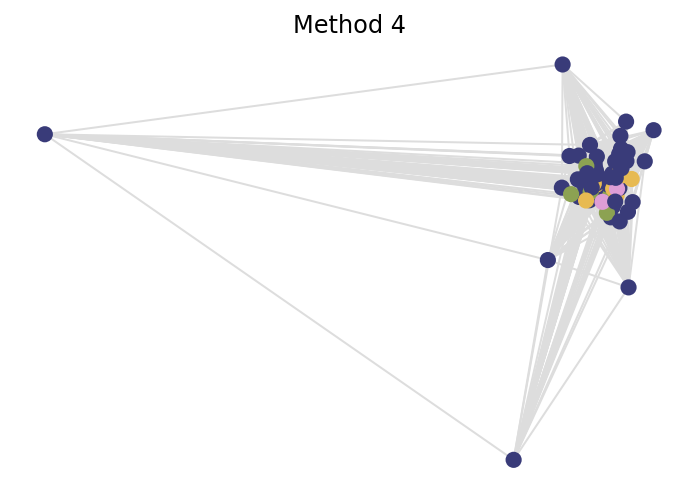

In [34]:
MZ.plot_flat(layout = nx.spectral_layout, node_color=cl4, title='Method 4')

In [40]:
#The new clustering methods are included below

#Distance based on spectral clusters at each layer
cl5 = MZ.multi_cluster5(20, m=5, mds_dim = 3, kmeans_clusters=5)

#Distance built by the average distance between nodes on each layer
cl6 = MZ.multi_cluster6(mds_dim = 3, kmeans_clusters=5)

#Distance build by first making a similarity matrix. This similarity matrix makes nodes connected with more paths of length 1 and 2 more similar
cl7 = MZ.multi_cluster7(mds_dim = 3, kmeans_clusters=5)

print('Method 5 cluster')
print(cl5)
print('Method 6 cluster')
print(cl6)
print('Method 7 cluster')
print(cl7)

Method 5 cluster
[1 2 2 0 1 4 1 0 4 2 3 2 0 4 1 4 2 2 0 1 1 3 4 2 2 2 2 1 1 1 1 1 1 3 1 3 4
 3 4 3 2 0 0 4 3 0 2 3 0 2 0 2 4 2 3 4 0 3 3 3 3 3 3 2 1 0 3 0 4 4 3 2 2 2
 1 1 4 4 0 0 4 3 2 4 3 3 0 4 1 4 2 2 2 3 2 3 0 4 4 0]
Method 6 cluster
[3 1 0 3 3 1 2 0 3 3 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 0 3 4
 1 3 4 0 0 4 4 4 0 0 4 4 1 2 0 2 0 3 0 1 4 0 2 0 3 1 2 4 3 1 4 1 3 4 1 1 0
 4 0 1 0 4 4 0 4 0 4 4 4 3 1 3 1 3 3 1 4 1 4 3 0 3 3]
Method 7 cluster
[3 1 0 0 3 1 4 3 4 4 2 0 0 3 4 0 2 0 1 4 3 2 3 4 0 1 2 3 4 0 2 2 0 2 0 4 1
 3 2 3 0 3 0 2 4 1 1 0 3 3 3 4 4 1 4 4 4 1 0 3 4 2 0 4 3 1 3 4 1 1 2 2 2 3
 1 3 2 2 3 1 0 1 1 1 0 3 2 3 3 1 0 1 4 0 0 2 2 2 4 1]


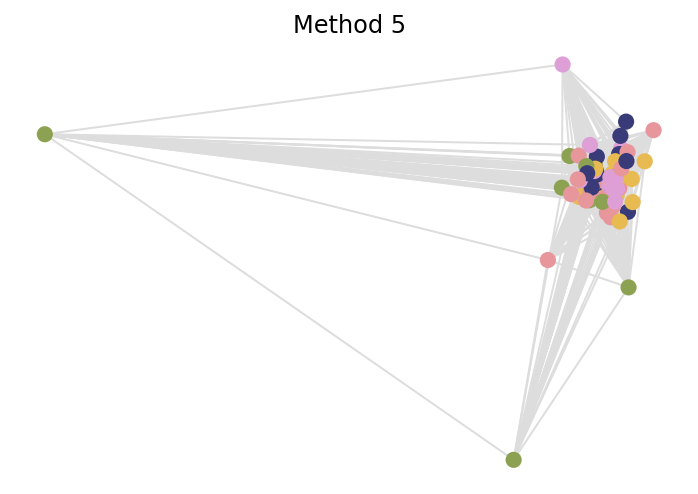

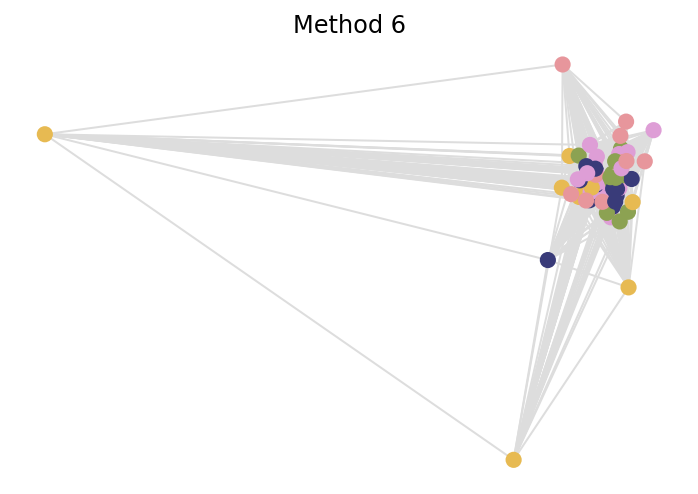

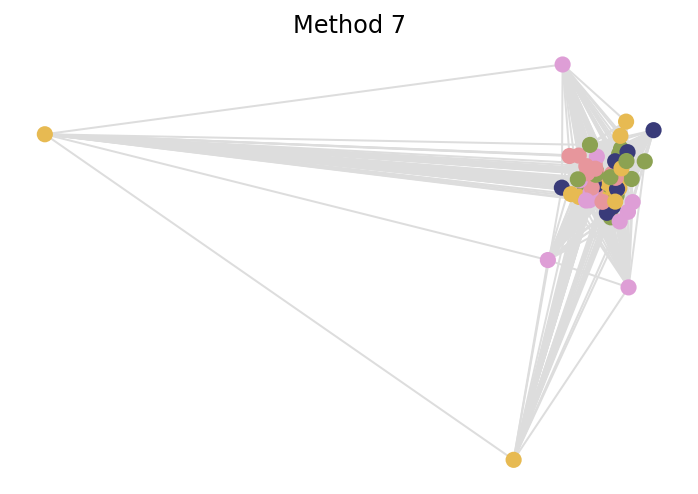

In [43]:
#Now, if we look at the plots
MZ.plot_flat(layout = nx.spectral_layout, node_color=cl5, title='Method 5')

MZ.plot_flat(layout = nx.spectral_layout, node_color=cl6, title='Method 6')

MZ.plot_flat(layout = nx.spectral_layout, node_color=cl7, title='Method 7')